In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns

#nltk.download('punkt')
#nltk.download('stopwords')

# Load and process attestation data

In [2]:
df = pd.read_csv("data/2023-10-17_indexed_attestations.csv")
df.rename(columns={'urlType': 'Website'}, inplace=True)
df.tail(2).T

,3116,3117
id,0x912611730f24a162a9500dcb54bf9ef651f1d22c7010...,0x912611730f24a162a9500dcb54bf9ef651f1d22c7010...
attester,0x1dAdaaF4d817eBcBBd9B0F9fC1b463152950630F,0x1dAdaaF4d817eBcBBd9B0F9fC1b463152950630F
timeCreated,1697544535,1697544535
name,Token Checker,Token Checker
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,An open source tool that empowers community ...,An open source tool that empowers community ...
impactCategory(ies),"END_USER_EXPERIENCE_AND_ADOPTION, OP_STACK","END_USER_EXPERIENCE_AND_ADOPTION, OP_STACK"
attestationType,impactMetric,fundingSource
attestationUrl,https://tokenchecker.dovepad.xyz/metric,NaN


In [3]:
CATEGORIES = ['OP_STACK', 'DEVELOPER_ECOSYSTEM', 'END_USER_EXPERIENCE_AND_ADOPTION', 'COLLECTIVE_GOVERNANCE']
LABELS = ['OP Stack', 'Developer Ecosystem', 'End User Experience', 'Collective Governance']

def explode_categories(row):
    categories = row['impactCategory(ies)'].split(', ')
    for cat in CATEGORIES:
        row[cat] = cat in categories
    return row

df = df.apply(explode_categories, axis=1)
df.rename(columns=dict(zip(CATEGORIES,LABELS)), inplace=True)
df.tail(2).T

,3116,3117
id,0x912611730f24a162a9500dcb54bf9ef651f1d22c7010...,0x912611730f24a162a9500dcb54bf9ef651f1d22c7010...
attester,0x1dAdaaF4d817eBcBBd9B0F9fC1b463152950630F,0x1dAdaaF4d817eBcBBd9B0F9fC1b463152950630F
timeCreated,1697544535,1697544535
name,Token Checker,Token Checker
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,An open source tool that empowers community ...,An open source tool that empowers community ...
impactCategory(ies),"END_USER_EXPERIENCE_AND_ADOPTION, OP_STACK","END_USER_EXPERIENCE_AND_ADOPTION, OP_STACK"
attestationType,impactMetric,fundingSource
attestationUrl,https://tokenchecker.dovepad.xyz/metric,NaN


# Analysis modules

In [4]:
def source_heatmap(attestation_type):
    
    filtered_data = df[df['attestationType'] == attestation_type]
    heatmap_data = filtered_data.groupby('Website')[LABELS].sum()
    significant_websites = filtered_data.groupby('Website')['attester'].nunique()
    indices = significant_websites[significant_websites>1].sort_values(ascending=False).index
    heatmap_data = heatmap_data.map(lambda x: None if x == 0 else x)
    heatmap_data = heatmap_data.loc[indices,]
    
    rows, cols = heatmap_data.shape
    fig, ax = plt.subplots(figsize=(cols*2, rows*.3), dpi=300)
    sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".0f", cbar=False, linewidths=1)
    ax.xaxis.set_ticks_position('top')
    ax.set_title(f"Number of {attestation_type} attested to by source (external website)\n")
    ax.tick_params(axis='x', labelrotation=0)

    plt.show()

In [5]:
STOPWORDS = nltk.corpus.stopwords.words('english') 
STOPWORDS.extend(['github', 'number', 'using', 'repo', 'idea', 'repository', 'twitter', 'x',
                  'optimism', 'open', 'source', 'projects','op', 'size', 'total'])

WEBSITES = ['github', 'etherscan', 'dune', 'twitter', 'optimism', 'google']

def get_most_common_metrics(attestation_type):
    
    for website in WEBSITES:
        print(f"Most common keywords for {website.upper()}...")
        filtered_data = df[(df['attestationType'] == attestation_type) & (df['Website'] == website)]        
        text = " ".join(filtered_data['attestationDescription'].dropna())
        tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
        filtered_tokens = [word for word in tokens if word not in STOPWORDS]
        word_freq = Counter(filtered_tokens)
        common_keywords = word_freq.most_common(20)
        common_keywords = [(x, count) for x, count in common_keywords if count >= 2]
        for (word, count) in common_keywords:
            print(word, count)
        print()

# Results

## Impact Metrics

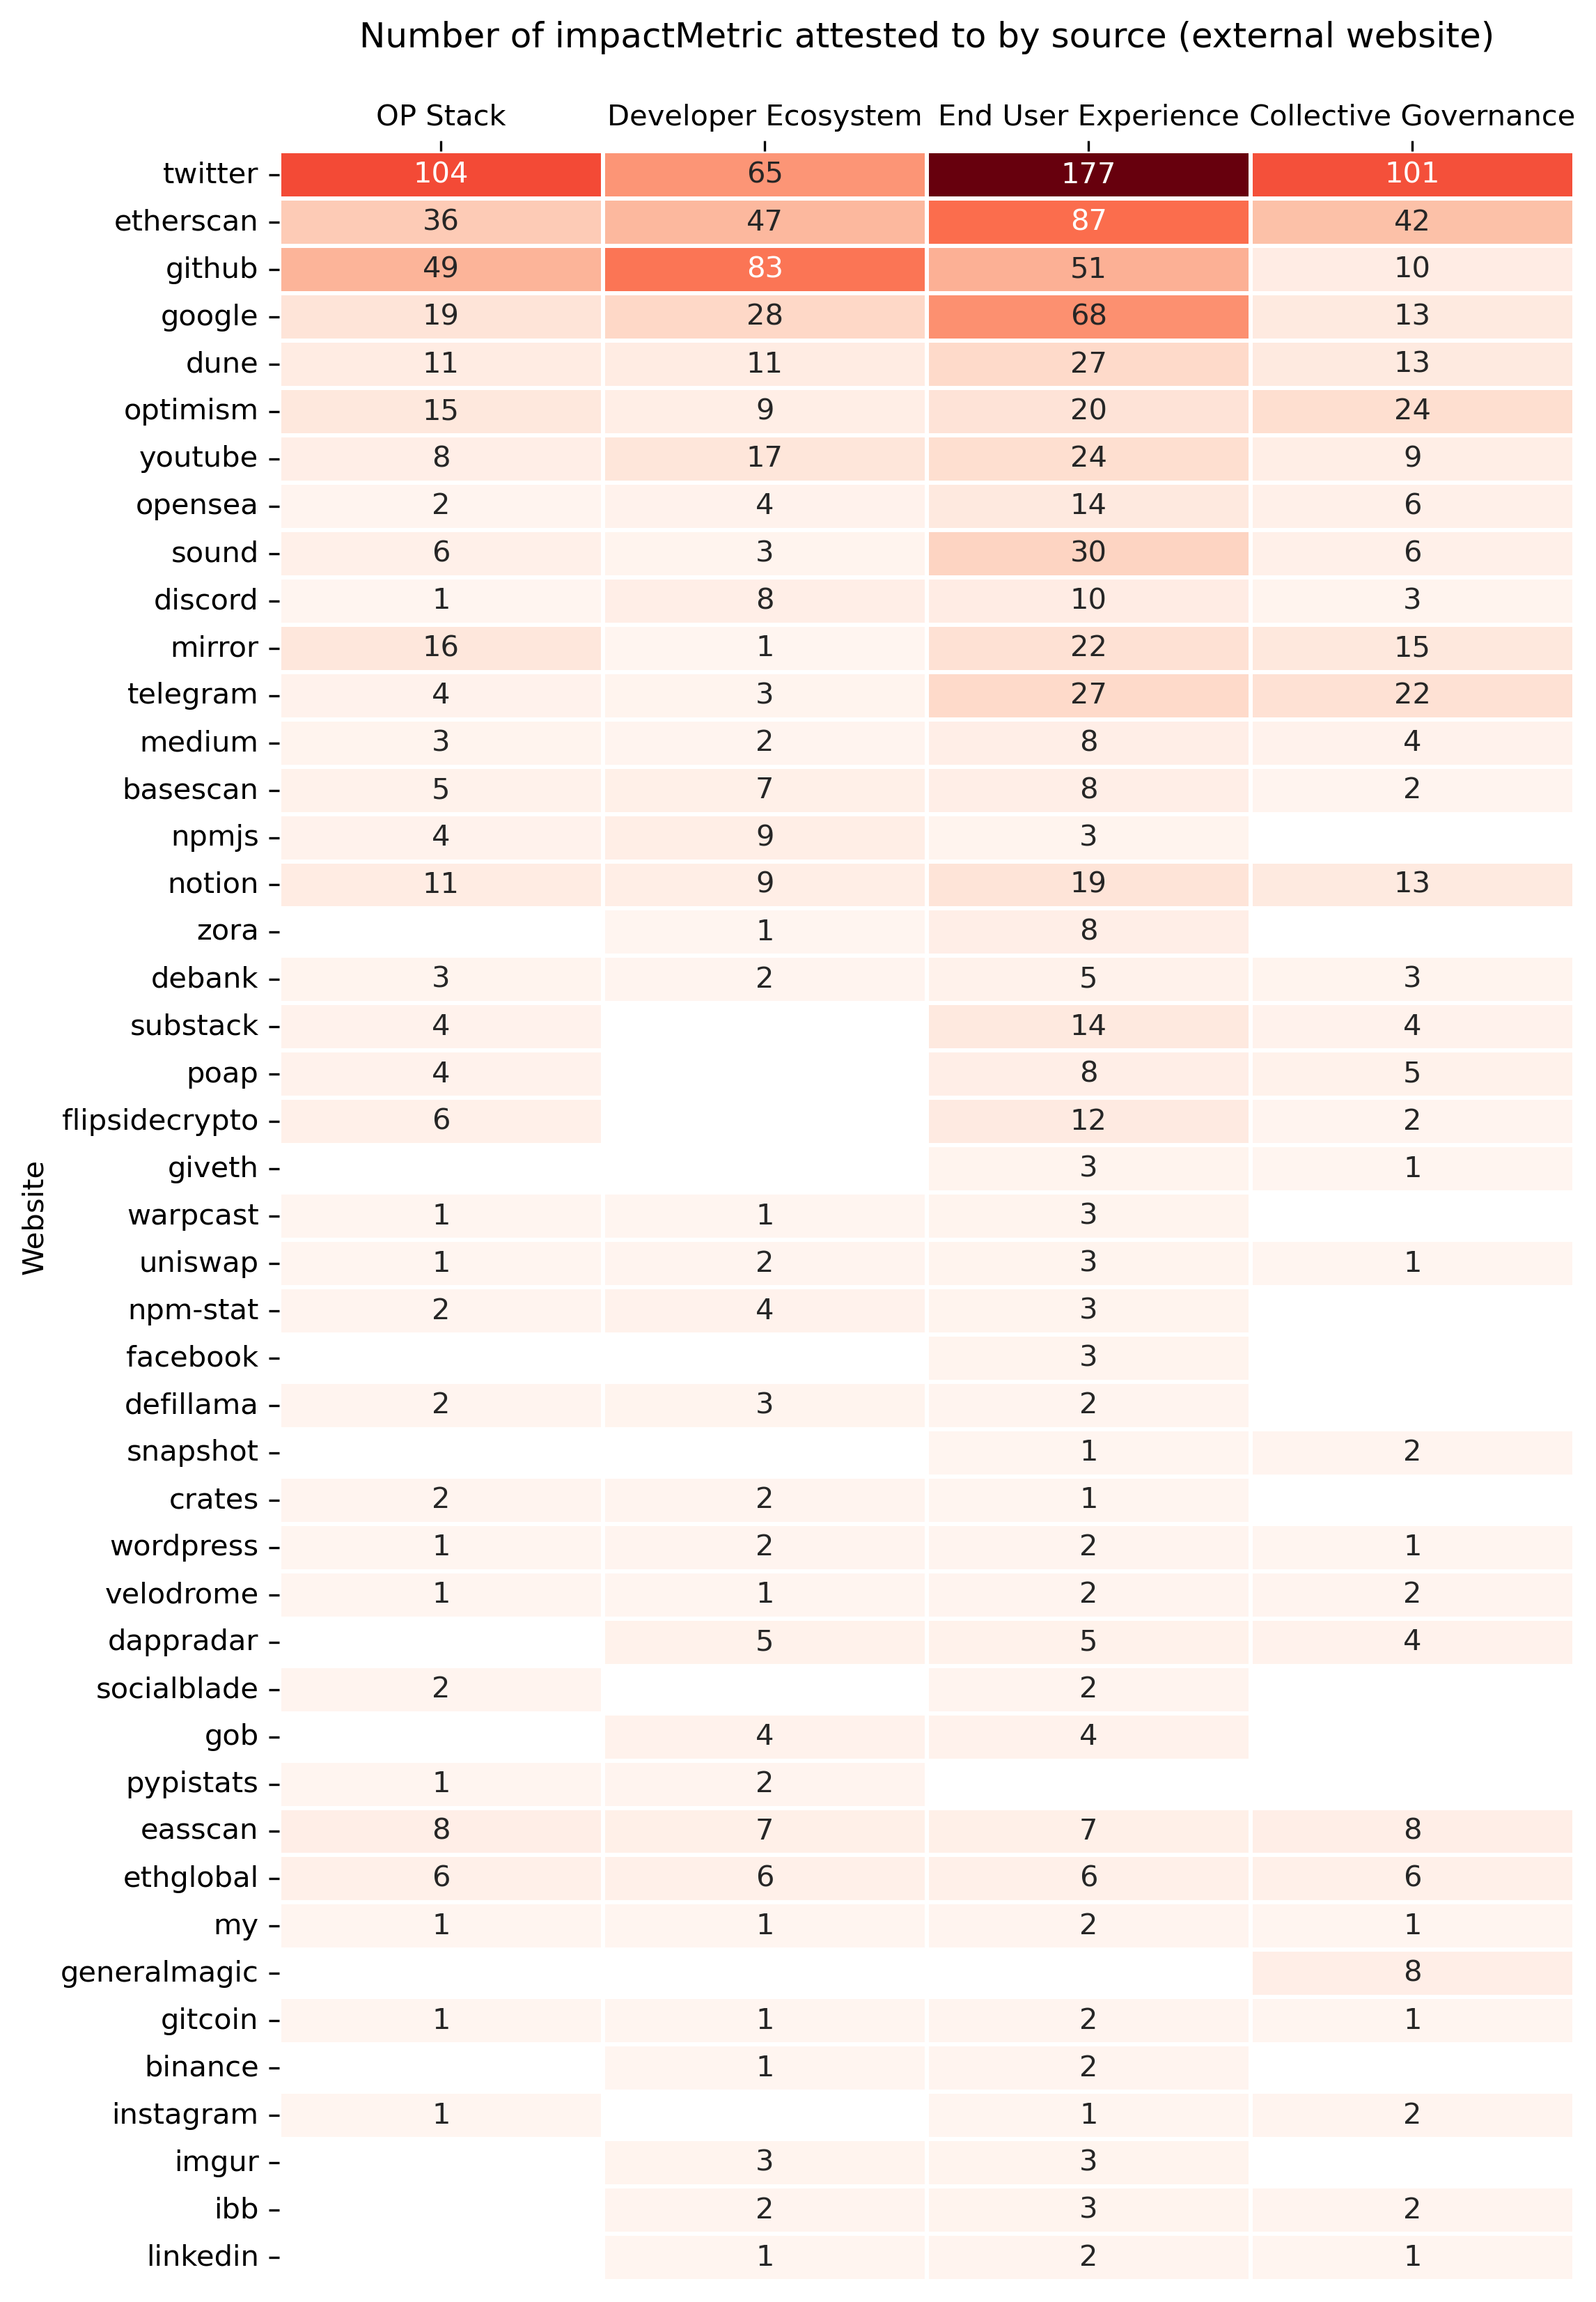

In [6]:
source_heatmap('impactMetric')

In [7]:
get_most_common_metrics('impactMetric')

Most common keywords for GITHUB...
stars 36
forks 10
contributors 4
downloads 3
dependent 3
synpress 3
repositories 3
star 2
unique 2
clones 2
commits 2
community 2
prs 2
dune 2
library 2
code 2
bytecode 2
blockchain 2
cli 2

Most common keywords for ETHERSCAN...
transactions 11
users 5
mint 4
contracts 4
made 4
transaction 3
address 3
contract 3
scan 2
etherscan 2
wallet 2
nft 2
goerli 2
tx 2
deployed 2
mainnet 2
testnet 2
swaps 2
bounties 2
funding 2

Most common keywords for DUNE...
dune 13
stars 10
created 4
unique 3
value 3
collective 3
snapshot 3
analytics 3
activity 2
addresses 2
eth 2
trades 2
quix 2
volume 2
hypercerts 2
hypercert 2

Most common keywords for TWITTER...
views 31
engagement 16
followers 15
tweet 9
impressions 8
listeners 7
weekly 5
layer 5
roundup 5
thread 4
unique 4
residents 4
houses 4
tweets 4
mention 4
article 4
post 4
opxlatam 4
eth 4
analysis 3

Most common keywords for OPTIMISM...
forum 3
analysis 2
views 2
delegate 2
created 2
impact 2
nother 2
impactw 2

## Contributions

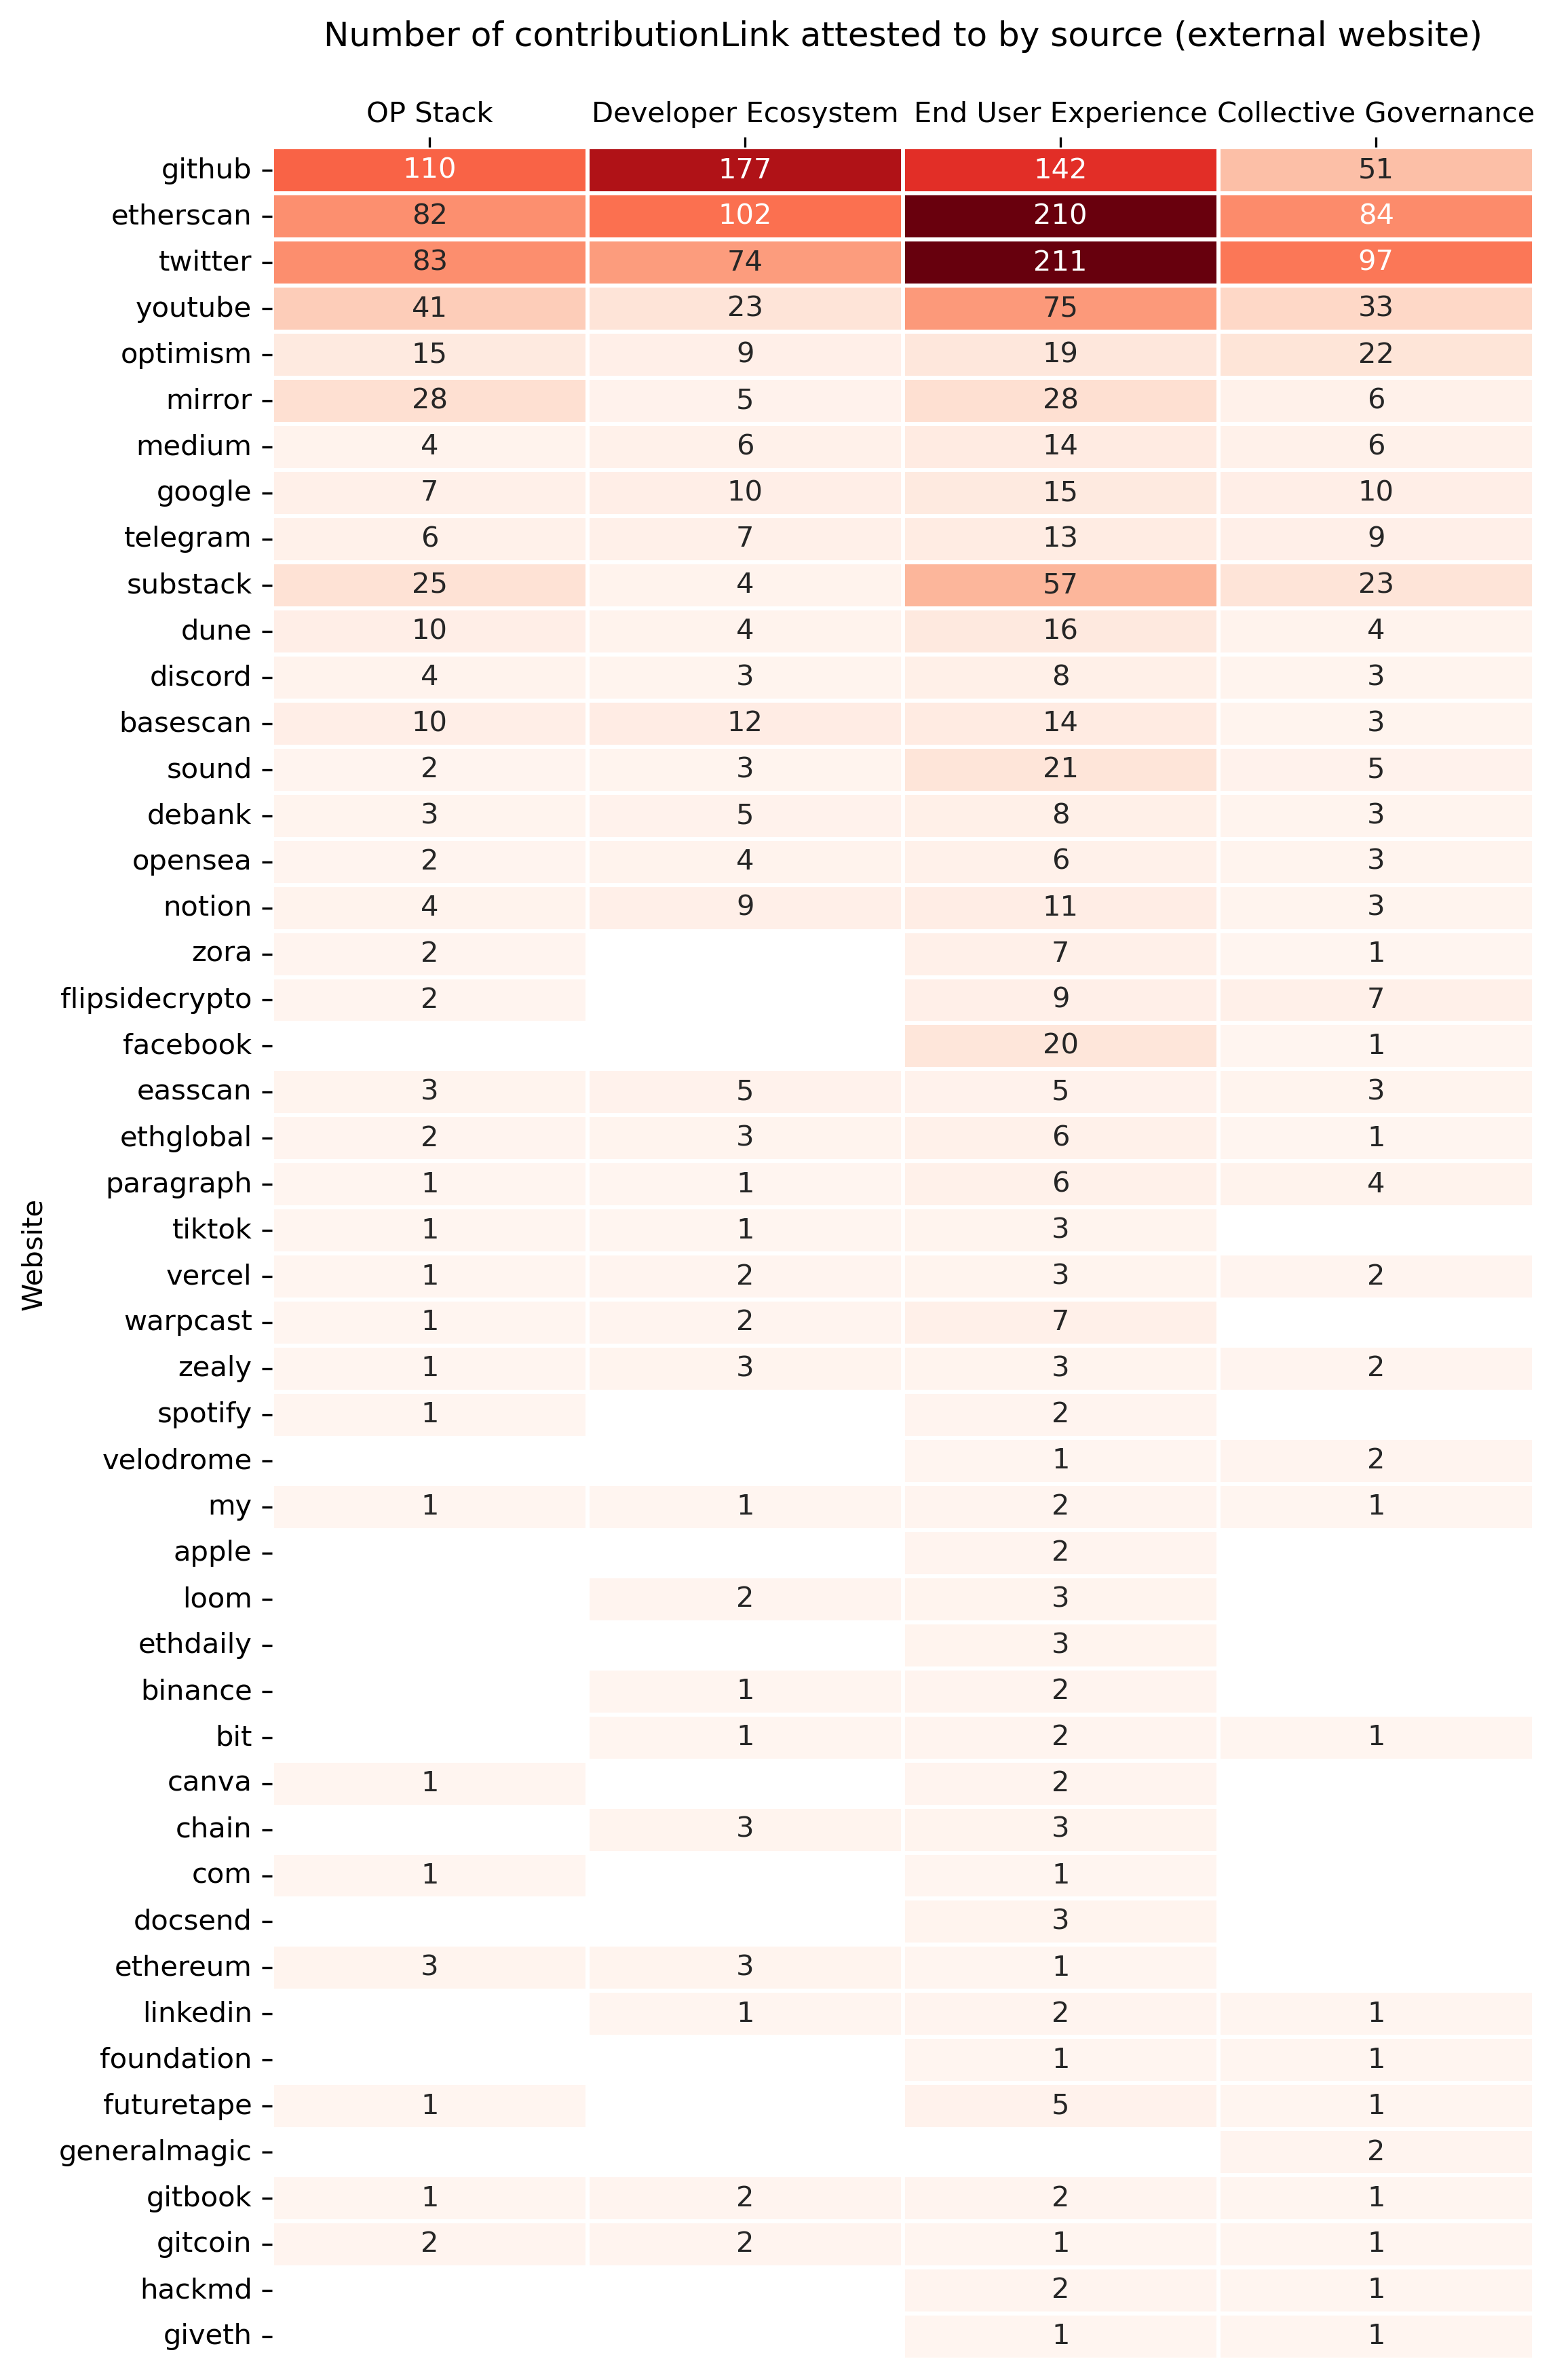

In [8]:
source_heatmap('contributionLink')

In [9]:
get_most_common_metrics('contributionLink')

Most common keywords for GITHUB...
project 17
code 16
evm 8
tool 8
contracts 8
dune 8
synpress 8
main 7
contract 7
protocol 7
revm 7
ethereum 7
solidity 7
used 6
contributions 6
stack 6
official 6
reth 6
client 6
api 6

Most common keywords for ETHERSCAN...
contract 59
nft 30
urban 14
gaming 10
pool 9
governance 8
transaction 8
wallet 8
testnet 8
funding 8
transactions 7
network 7
project 7
dao 7
onchain 7
contracts 6
address 6
education 6
etherscan 6
mint 6

Most common keywords for DUNE...
dune 14
dashboard 14
governance 2
link 2

Most common keywords for TWITTER...
thread 32
post 19
bedrock 11
account 9
ink 9
tank 9
stack 9
rollups 8
tweet 7
new 6
community 6
research 5
news 5
mentioning 5
event 5
analysis 4
https 4
governance 4
mainnet 4
chains 4

Most common keywords for OPTIMISM...
analysis 3
delegate 3
proposal 3
incentive 2
impact 2
token 2
house 2
dwoijjajknldwakn 2
awdk 2
daw 2
forum 2
mission 2
delegation 2
statement 2
eas 2
gov 2

Most common keywords for GOOGLE...
week 3
g

# BACKUP

In [10]:
def plot_category(impact_category):

    fig, ax = plt.subplots(figsize=(10,5))

    dff = df[df['impactCategory(ies)'].str.contains(impact_category)]
    num_projects = dff['attester'].nunique()

    (dff
     .query("attestationType == 'impactMetric'")
     .groupby('Website')['attester']
     .nunique()
     .sort_values()
     .tail(20)
     / num_projects
    ).plot(kind='barh', color="#FF0420")

    ax.set_title(f"{impact_category} ({num_projects} projects)")

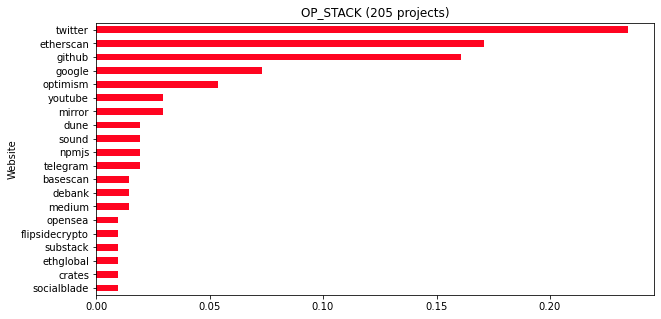

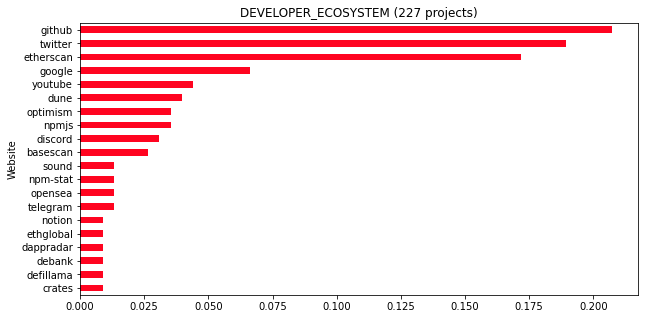

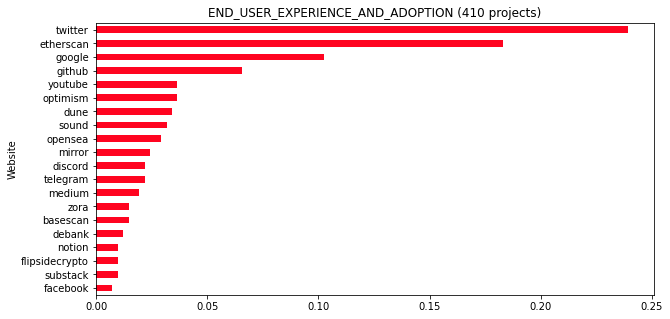

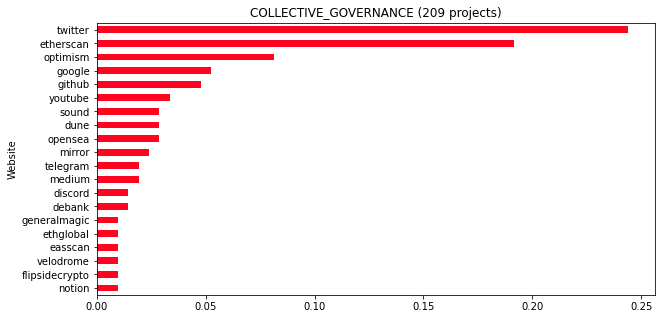

In [11]:
for c in CATEGORIES:
    plot_category(c)